# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Set your project path 
project_path =  "/content/drive/My Drive/NLP Project/Data/"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
df = pd.read_json(project_path + "Sarcasm_Headlines_Dataset.json",lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [5]:
df = df.drop(['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [6]:
df['len'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


In [7]:
#maximum length
df['len'].max()

39

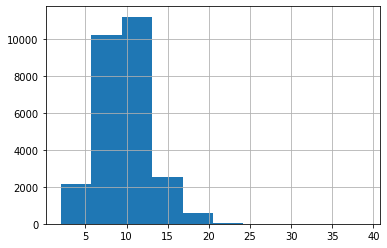

In [21]:
df['len'].hist()

#**## Modelling**

## Import required modules required for modelling.

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [9]:
max_features = 10000
maxlen = 20
embedding_size = 300

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [10]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [11]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0  307  678 3336 2297
   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [12]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [13]:
glove_file = project_path + "glove.6B.zip"

In [14]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [15]:
EMBEDDING_FILE = 'Data/glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [16]:
embedding_matrix = np.zeros((num_words, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [17]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [19]:
batch_size = 100
epochs = 5

history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 72s 3ms/sample - loss: 0.0483 - accuracy: 0.9844 - val_loss: 1.0610 - val_accuracy: 0.8504
Epoch 2/5
21367/21367 [==============================] - 72s 3ms/sample - loss: 0.0345 - accuracy: 0.9893 - val_loss: 1.2515 - val_accuracy: 0.8516
Epoch 3/5
21367/21367 [==============================] - 72s 3ms/sample - loss: 0.0249 - accuracy: 0.9924 - val_loss: 1.2989 - val_accuracy: 0.8520
Epoch 4/5
21367/21367 [==============================] - 72s 3ms/sample - loss: 0.0147 - accuracy: 0.9955 - val_loss: 1.4171 - val_accuracy: 0.8457
Epoch 5/5
21367/21367 [==============================] - 72s 3ms/sample - loss: 0.0150 - accuracy: 0.9957 - val_loss: 1.3511 - val_accuracy: 0.8422
